# Script to identify the trophic state in a list of lakes with total phosphorus (PT) data 


Trophic means "of or relating to nutrition". The thophic state index is a classification system designed to rate lakes, ponds and resrvoirs base on the amount of biological productivity ocuring in water (USF Water Institute, 2025). 
There are some parametrets such chlorophyll, total phosphorus and total nitrogen that help us to classify and identify de throphic state. 

Diferent authors have reported the limits for each state. 
- Oligotrophic: where waterbodies have the lowest level of productivity;
- Mesotrophic: where waterbodies have a moderate level of biological productivity;
- Eutrophic: where waterbodies have a high level of biological productivity;
- Hypereutrophic: where waterbodies have the highest level of biological productivity. 

The trophic state of a waterbody can also affect its use or perceived utility. 

Phosphorus is a nutrient that contributes to the growth of photosynthetic organisms. 

**In this script, the clasification is based on the CEPIS methodology.**


## References
- USF Water Institute. (2025). Learn more: Trophic State Index (TSI). Retrieved from https://lake.wateratlas.usf.edu/library/learn-more/learnmore.aspx?toolsection=lm_tsi
- CEPIS. (2001).  Metodologías simplificadas para la evaluación de eutroficación en lagos cálidos tropicales. Centro Panamericano de Ingeniería Sanitaria y Ciencias del Ambiente. 

## Fast check of data

In [18]:
# First we need want to analize the data base

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_lakes.csv")

# Print information

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())



          Lago                     Referencia Mes  Estación   Época  \
0        Laguna       Herrera y Nadaoka, 2020   7    Verano  Verano   
1        Laguna       Herrera y Nadaoka, 2020  12     Otoño    Otro   
2  Experimento             Kelly et al., 2021   7    Verano  Verano   
3     Kastoria   Stefanidis y Dimitriou, 2019   1  Invierno    Otro   
4     Kastoria   Stefanidis y Dimitriou, 2020   7    Verano  Verano   

                  Lugar  Hemisferio  Zona climática   PT (mg/L)  NT (mg/L)  \
0              Filipinas       Norte       Tropical        0.07       0.02   
1              Filipinas       Norte       Tropical        0.09       0.04   
2        Mississipi, USA       Norte     Subtropical       0.10       0.55   
3  Grecia (mediterráneo)       Norte        Templada       0.20       0.27   
4  Grecia (mediterráneo)       Norte        Templada       0.20       0.27   

   PT (mmol)  NT (mmol)  
0     0.0023       0.00  
1     0.0029       0.00  
2     0.0031       0.04  


In [19]:
# Creat new PT/NT
df["PT_NT_ratio"] = df["PT (mg/L)"] / df["NT (mg/L)"]


print(df[["PT (mg/L)", "NT (mg/L)", "PT_NT_ratio"]].head())

   PT (mg/L)  NT (mg/L)  PT_NT_ratio
0       0.07       0.02     3.500000
1       0.09       0.04     2.250000
2       0.10       0.55     0.181818
3       0.20       0.27     0.740741
4       0.20       0.27     0.740741


In [20]:
from scipy.stats import shapiro

# Shapiro-Wilk normality test for PT, NT and PT/NT ratio
for col in ["PT (mg/L)"]:
    stat, p = shapiro(df[col].dropna())  # drop NaN values
    print(f"\nVariable: {col}")
    print(f"Shapiro-Wilk statistic = {stat:.4f}, p-value = {p:.4f}")

    if p > 0.05:
        print("✅ Fail to reject H0: data seems normally distributed")
    else:
        print("❌ Reject H0: data is NOT normally distributed")


Variable: PT (mg/L)
Shapiro-Wilk statistic = 0.2530, p-value = 0.0000
❌ Reject H0: data is NOT normally distributed


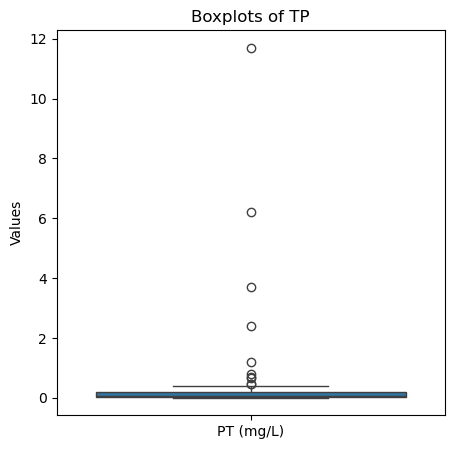

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the variables we want to plot
vars_to_plot = ["PT (mg/L)"]

plt.figure(figsize=(5,5))
sns.boxplot(data=df[vars_to_plot])
plt.title("Boxplots of TP")
plt.ylabel("Values")
plt.show()

## Script to determine the trophic state

In [22]:
# Function to classify trophic state based on PT
def classify_trophic_state(pt_value):
    if pt_value < 0.04:
        return "Oligotrophic"
    elif pt_value < 0.08:
        return "Mesotrophic"
    elif pt_value < 0.2:
        return "Eutrophic"
    else:
        return "Hypereutrophic"

# Apply classification to the dataset
df["Trophic_State"] = df["PT (mg/L)"].apply(classify_trophic_state)

# Show a preview
print(df[["PT (mg/L)", "Trophic_State"]].head())

   PT (mg/L)   Trophic_State
0       0.07     Mesotrophic
1       0.09       Eutrophic
2       0.10       Eutrophic
3       0.20  Hypereutrophic
4       0.20  Hypereutrophic



Trophic state distribution:
Trophic_State
Oligotrophic      30
Hypereutrophic    23
Eutrophic         21
Mesotrophic       18
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7048\2908054128.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Trophic_State", order=["Oligotrophic","Mesotrophic","Eutrophic","Hypereutrophic"], palette="viridis")


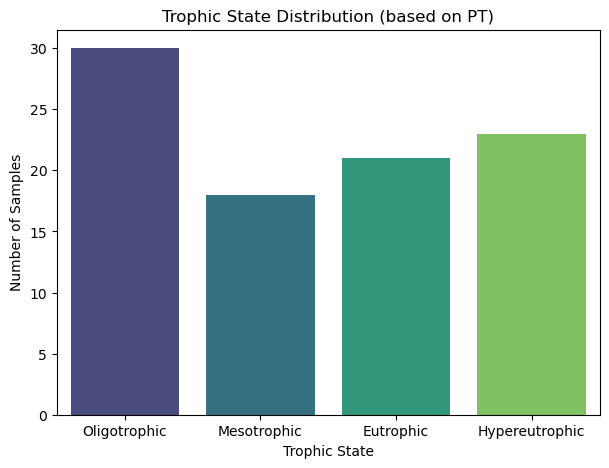

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to classify trophic state based on PT (mg/L)
def classify_trophic_state(pt_value):
    if pt_value < 0.04:
        return "Oligotrophic"
    elif pt_value < 0.08:
        return "Mesotrophic"
    elif pt_value < 0.2:
        return "Eutrophic"
    else:
        return "Hypereutrophic"

# Apply classification to the dataset
df["Trophic_State"] = df["PT (mg/L)"].apply(classify_trophic_state)

# Summary of trophic states
print("\nTrophic state distribution:")
print(df["Trophic_State"].value_counts())

# Bar plot of trophic state distribution
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Trophic_State", order=["Oligotrophic","Mesotrophic","Eutrophic","Hypereutrophic"], palette="viridis")
plt.title("Trophic State Distribution (based on PT)")
plt.xlabel("Trophic State")
plt.ylabel("Number of Samples")
plt.show()